In [1]:
import numpy as np
import time

# print out each line in the input cell not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expand the cell width to 100% of t 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Abschlussprojekt: Chaos Probleme - Julia Mengen
---
**Erstellt von: Simon Gärtner**

*Wir haben uns dazu entschlossen, die Dokumentation in das SageMath Skript einzubinden. Daher finden Sie hier eine ausführliche Erklärung des Problems, des Skriptes, der Ergebnisse und der Arbeitsaufteilung.*


## Einführung
---

### Was sind Julia Mengen?

Die Julia-Megen wurden nach dem französischen Mathematiker Gaston Julia benannt, der im Jahr 1919 die Folge der Gleichung $z_{n+1}=z_n^2 + i$ für komplexe Zahlen untersuchte. Insbesondere betrachtete er, welche Zahlen der komplexen Ebenen nach mehrfachem anwenden dieser Gleichung gegen $\pm \infty$ konvergieren.

Hierfür verallgemeinerte er die Formel zu $z_{n+1}=z_n^2 + c$. Die verschiedenen Variablen haben folgende Bedeutung:
- $z_{n+1}$ Wert der auf $z_n$ folgt
- $c$ komplexe Zahl, die frei gewählt werden darf
- Startwert $z_0$: Koordinate aus der komplexen Ebenen

Interessant ist hier zu beobachten, dass für jedes c eine andere Julia Menge entsteht, auch wenn die Änderung an c noch so klein ist.

### Parameter für Julia Mengen

Zu Beginn der Erstellung müssen folgende Parameter festgelegt werden:
1. Konstante c: wird bei jeder Funktion auf die Potenz von $z_n$ auf addiert
2. Formel: Julia Mengen verwenden folgende Iterationsvorschrift: $z_{n+1}=z_n^2+c$
3. x-start und x-end: Größe des Bildes auf der x-Achse
4. y-start und y-end: Größe des Bildes auf der y-Achse
5. scaling: Auflösung des Bildes, z.B. bei 10 wird ein 1x1 Feld in insgesamt 100 Pixel aufgebrochen.
6. Grenze: Ab welchen Wert gilt das Ergebnis als "unendlich"
7. Grenze für Iterationen: Ab wie vielen Recheniterationen wird die Folge abgebrochen.

### Erstellung von Julia Mengen Grafiken

## Implementierung in SageMath & Analyse der Ergebnisse
---

In [2]:
# Define variables
x, c = var('x', 'c')

In [3]:
def initialize_julia_sets(constant_c, formula, x_start, x_end, y_start, y_end, scaling):
    """
    Initializes the parameters for generating Julia sets.

    Args:
        constant_c (complex): The constant value used in the Julia set formula.
        formula (str): The formula used for generating the Julia set.
        x_start (float): The starting value for the x-axis range.
        x_end (float): The ending value for the x-axis range.
        y_start (float): The starting value for the y-axis range.
        y_end (float): The ending value for the y-axis range.
        scaling (int): The scaling factor used for incrementing the values.

    Returns:
        dict: A dictionary containing the initialized parameters for generating Julia sets.
            - 'constant_c': The constant value used in the Julia set formula.
            - 'formula': The formula used for generating the Julia set.
            - 'x_start': The starting value for the x-axis range.
            - 'x_end': The ending value for the x-axis range.
            - 'y_start': The starting value for the y-axis range.
            - 'y_end': The ending value for the y-axis range.
            - 'scaling': The scaling factor used for incrementing the values.
    """
    return {
        'constant_c': constant_c,
        'formula': formula,
        'x_start': x_start,
        'x_end': x_end,
        'y_start': y_start,
        'y_end': y_end,
        'scaling': scaling
    }

In [4]:
def get_function_value(func, x, c):
    """
    Calculates the function value by calling the provided function with the given arguments.

    Args:
        func (callable): The function to be called.
        x: The first argument to be passed to the function.
        c: The second argument to be passed to the function.

    Returns:
        The value obtained by calling the function with the provided arguments.
    """
    return func(x, c)

In [5]:
def initialize_matrix(setup):
    """
    Initializes a matrix using the provided setup parameters.

    Args:
        setup (dict): A dictionary containing the setup parameters for matrix initialization.

    Returns:
        Matrix: The initialized matrix.

    """
    matrix_list = []

    for col in np.arange(setup['x_start'], setup['x_end'] + 1, 1 / setup['scaling']):
        col_list = []

        for row in np.arange(setup['y_start'], setup['y_end'] + 1, 1 / setup['scaling']):
            col_list.append(col + row * 1j)
        matrix_list.append(col_list)

    return Matrix(CDF, matrix_list)

In [6]:
def print_matrix(matrix):
    """
    Prints a visual representation of the matrix.

    Args:
        matrix: The matrix to be plotted.

    Returns:
        The visual representation of the matrix.

    """
    return matrix_plot(matrix, cmap='seismic', colorbar=True, axes=False, frame=True)

In [7]:
def validate_point(func, complex_number, setup):
    """
    Validates a complex number using a function and a setup dictionary.

    Args:
        func (callable): The function used to calculate the next value of the complex number.
        complex_number (complex): The initial complex number to be validated.
        setup (dict): A dictionary containing the setup parameters.

    Returns:
        int: The number of iterations until the complex number exceeded the validation bounds or the maximum number of iterations reached.

    """
    run = 200

    while complex_number > -100 and run > 0 and complex_number < 100:
        complex_number = get_function_value(func, complex_number, setup['constant_c'])
        run -= 1

    return run

In [8]:
def change_matrix(func, matrix, setup):
    """
    Changes the values in the matrix based on the given function and setup parameters.

    Args:
        func (callable): The function used to validate each complex number in the matrix.
        matrix: The matrix to be modified.
        setup (dict): A dictionary containing the setup parameters.

    Returns:
        Matrix: The modified matrix.

    """
    new_list = []

    for row in range((setup['y_end'] - setup['y_start']) * setup['scaling'] + 1):
        rows = []

        for col in range((setup['x_end'] - setup['x_start']) * setup['scaling'] + 1):
            rows.append(validate_point(func, matrix[col][row], setup))

        new_list.append(rows)

    return Matrix(CDF, new_list)

Initialize setup...
Initialize done: 0.0 seconds!
Initialize Matrix...
Initialize done: 0.06 seconds!
Calculating....
Calculation done: 25.25 seconds!


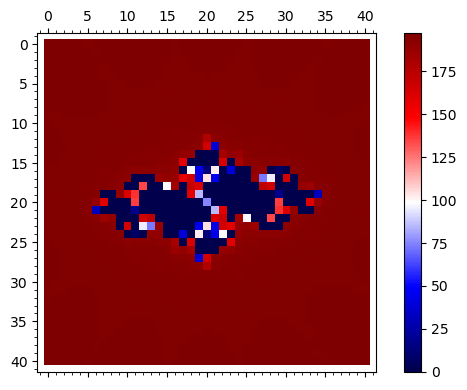

Overall time: 26.32 seconds!


In [9]:
t2 = time.time()

print('Initialize setup...')

t0 = time.time()

# Initialize setup parameters
setup = initialize_julia_sets(-0.7423 + 0.105j, 'x^2+c', -2, 2, -2, 2, 10)
func(x, c) = setup['formula']

t1 = time.time()

print('Initialize done: ' + str(round(t1 - t0, 2)) + ' seconds!')

print('Initialize Matrix...')

t0 = time.time()

# Initialize matrix
matrix = initialize_matrix(setup)

t1 = time.time()

print('Initialize done: ' + str(round(t1 - t0, 2)) + ' seconds!')

print('Calculating....')

t0 = time.time()

# Change matrix values
matrix = change_matrix(func, matrix, setup)

t1 = time.time()

print('Calculation done: ' + str(round(t1 - t0, 2)) + ' seconds!')
print_matrix(matrix)

t3 = time.time()

print('Overall time: ' + str(round(t3 - t2, 2)) + ' seconds!')

## Auswertung des Algorithmusses
---

*Inhalt folgt*

## Fazit
---

*Inhalt folgt!*

## Übungsaufgaben
---

*Inhalt folgt!*

## Lösungen
---

*Inhalt folgt!*

## Literatur
---

### Bildquellen
Alle hier in der Dokumentation dargestellten Bilder wurden durch dieses Programm erstellt.